In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Set Paths
data_path = '/content/drive/MyDrive/ds_abhishekparihar/csv_files/'
output_path = '/content/drive/MyDrive/ds_abhishekparihar/outputs/'

In [4]:
# Load Data
sentiment_df = pd.read_csv(data_path + 'fear_greed_index.csv')
trader_df = pd.read_csv(data_path + 'historical_data.csv')

In [6]:
# Clean & Prepare Dates
sentiment_df['Date'] = pd.to_datetime(sentiment_df['date']).dt.date
trader_df['Date'] = pd.to_datetime(trader_df['Timestamp IST'], dayfirst=True).dt.date

In [8]:
# Merge Both Datasets
merged_df = pd.merge(trader_df, sentiment_df[['Date', 'classification']], on='Date', how='inner')

In [9]:
# Save Merged Data
merged_df.to_csv(data_path + 'merged_data.csv', index=False)

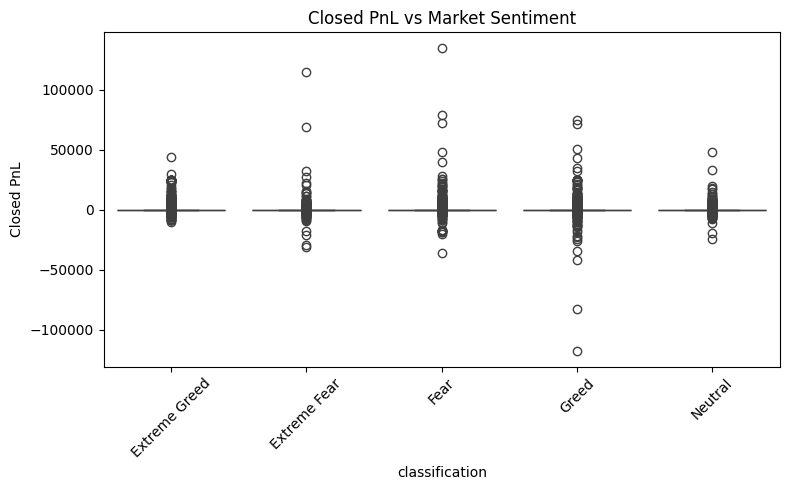

In [10]:
# Plot - PnL vs Sentiment
plt.figure(figsize=(8,5))
sns.boxplot(data=merged_df, x='classification', y='Closed PnL')
plt.title("Closed PnL vs Market Sentiment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(output_path + 'pnl_vs_sentiment.png')
plt.show()

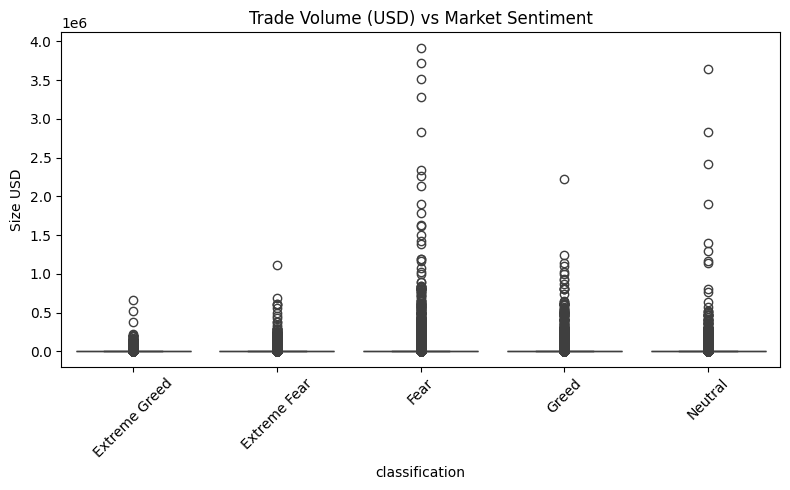

In [11]:
# Plot - Trade Size vs Sentiment
plt.figure(figsize=(8,5))
sns.boxplot(data=merged_df, x='classification', y='Size USD')
plt.title('Trade Volume (USD) vs Market Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(output_path + 'volume_vs_sentiment.png')
plt.show()

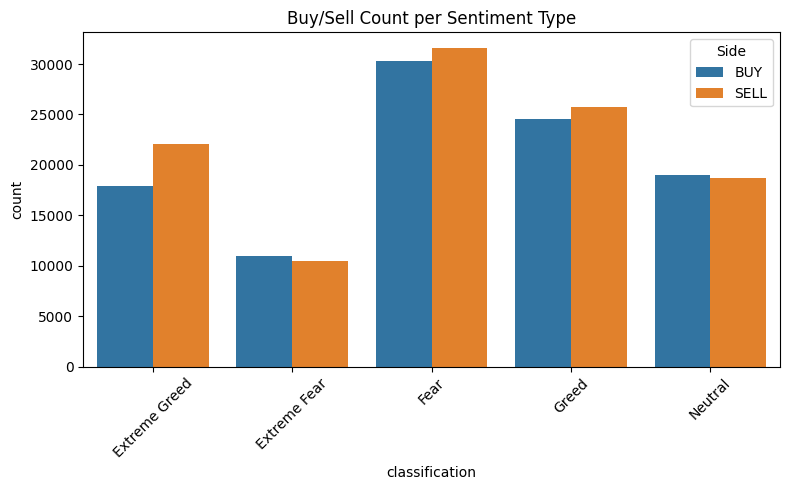

In [13]:
# Count - Buy vs Sell
plt.figure(figsize=(8,5))
sns.countplot(data=merged_df, x='classification', hue='Side')
plt.title('Buy/Sell Count per Sentiment Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(output_path + 'side_vs_sentiment.png')
plt.show()

In [14]:
# Basic Insight Output
print('Total Traders:', len(merged_df))
print('Unique Traders:', merged_df['Account'].nunique())
print('Average PnL in Fear:', merged_df[merged_df['classification'].str.contains("Fear")]['Closed PnL'].mean())
print('Average PnL in Greed:', merged_df[merged_df['classification'].str.contains('Greed')]['Closed PnL'].mean())

Total Traders: 211218
Unique Traders: 32
Average PnL in Fear: 49.212077443108235
Average PnL in Greed: 53.88228122956974
